In [0]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 5)
import seaborn as sns

In [0]:
import numpy as np
import pandas as pd
import scipy as sp
import os
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

In [0]:
from google.colab import files #execute this if you wannt upload the file
uploaded = files.upload()

Saving income_fact.csv to income_fact.csv


In [0]:
import io
income = pd.read_csv(io.BytesIO(uploaded['income_fact.csv']), sep=r'\s*,\s*', engine='python')
income.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,39,5,77516,2,13,2,0,1,1,1,2174,0,40,1,0
1,1,50,4,83311,2,13,0,3,0,1,1,0,0,13,1,0
2,2,38,2,215646,4,9,3,5,1,1,1,0,0,40,1,0
3,3,53,2,234721,6,7,0,5,0,0,1,0,0,40,1,0
4,4,28,2,338409,2,13,0,9,0,0,0,0,0,40,0,0


In [0]:
# processed data for data-viz


In [0]:
income['income'].value_counts()

0    23068
1     7650
Name: income, dtype: int64

In [0]:
income['capital-gain']=np.where(income['capital-gain'] >0 , int(1), income['capital-gain'])

In [0]:
income['capital-gain'].value_counts()

0    28129
1     2589
Name: capital-gain, dtype: int64

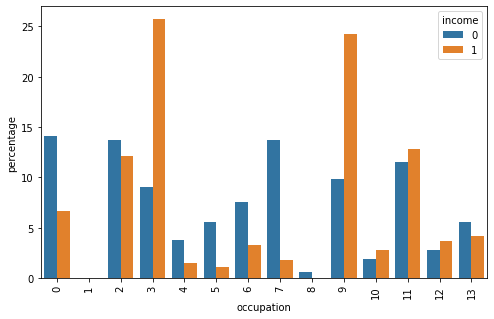

In [0]:
occupation_counts = (income.groupby(['income'])['occupation']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('occupation'))
p = sns.barplot(x="occupation", y="percentage", hue="income", data=occupation_counts)
_ = plt.setp(p.get_xticklabels(), rotation=90)

In [0]:
# Start sampling

In [0]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [0]:
smk = SMOTETomek(random_state = 42)

In [0]:
nm = NearMiss(random_state = 1)

In [0]:
X = income.drop(['income','Unnamed: 0'], axis = 1)

In [0]:
y = income['income']

In [0]:
X.head() 

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,5,77516,2,13,2,0,1,1,1,2174,0,40,1
1,50,4,83311,2,13,0,3,0,1,1,0,0,13,1
2,38,2,215646,4,9,3,5,1,1,1,0,0,40,1
3,53,2,234721,6,7,0,5,0,0,1,0,0,40,1
4,28,2,338409,2,13,0,9,0,0,0,0,0,40,0


In [0]:
X_res, y_res = smk.fit_sample(X,y)

In [0]:
from collections import Counter
print(Counter(y_res))

Counter({0: 20820, 1: 20820})


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2)

In [0]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 5)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)
print(rfe.ranking_)

[False  True False False  True  True False  True False False False False
 False  True]
[ 3  1 10  5  1  1  6  1  7  2  9  8  4  1]


In [0]:
# get rfe columns
for i in range(len(rfe.support_)):
  if rfe.support_[i] == True:
    print(X.columns[i])

workclass
education-num
marital-status
relationship
native-country


In [0]:
# X_final = X.drop(['Unnamed: 0'], axis = 1)

In [0]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.388847
         Iterations 9
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.439     
Dependent Variable: y                AIC:              25934.5638
Date:               2020-01-17 06:35 BIC:              26052.3552
No. Observations:   33312            Log-Likelihood:   -12953.   
Df Model:           13               LL-Null:          -23090.   
Df Residuals:       33298            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
x1        0.0218     0.0013    17.2108   0.0000    0.0193    0.0243
x2       -0.4503     0.0171   -26.4000   0.0000   -0.4837 

In [0]:
# Creating dummies 
factors = ['workclass','education', 'marital-status','occupation','relationship','race','sex', 'native-country','income']

In [0]:
for var in factors:
    if var != 'income':
        cat_list='var'+'_'+var
        cat_list = pd.get_dummies(income[var], prefix=var)
        income = pd.concat([income,cat_list], axis = 1)
        income = income.drop(var, 1)
income.head()

,Unnamed: 0,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_0,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,education_0,education_1,education_2,education_3,education_4,education_5,education_6,education_7,education_8,marital-status_0,marital-status_1,marital-status_2,marital-status_3,occupation_0,occupation_1,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,occupation_7,occupation_8,occupation_9,occupation_10,occupation_11,occupation_12,occupation_13,relationship_0,relationship_1,relationship_2,relationship_3,race_0,race_1,sex_0,sex_1,native-country_0,native-country_1
0,0,39,77516,13,2174,0,40,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1
1,1,50,83311,13,0,0,13,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1
2,2,38,215646,9,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1
3,3,53,234721,7,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1
4,4,28,338409,13,0,0,40,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0


In [0]:
X = income #X = df.drop(['metric_orientationLeadTime','leadtime'], axis = 1)

In [0]:
X = X.drop(['Unnamed: 0','income'], axis = 1)

In [0]:
X.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_0,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,education_0,education_1,education_2,education_3,education_4,education_5,education_6,education_7,education_8,marital-status_0,marital-status_1,marital-status_2,marital-status_3,occupation_0,occupation_1,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,occupation_7,occupation_8,occupation_9,occupation_10,occupation_11,occupation_12,occupation_13,relationship_0,relationship_1,relationship_2,relationship_3,race_0,race_1,sex_0,sex_1,native-country_0,native-country_1
0,39,77516,13,2174,0,40,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1
1,50,83311,13,0,0,13,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1
2,38,215646,9,0,0,40,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1
3,53,234721,7,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1
4,28,338409,13,0,0,40,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0


In [0]:
# X_res_dum, y_res_dums = smk.fit_sample(X,y)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


In [0]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 10)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False False
 False False False False  True  True False  True  True False  True False
 False False False False False False  True  True False  True  True False
 False False False False False False  True False False False False False
 False False]
[33 38 29 37 36 35  9 28 21  7 26 15 40  4  3 34  1  1  8  1  1  2  1 18
  6 19 12 41 14  5  1  1 11  1  1 30 32 22 39 13 20 10  1 31 24 27 16 23
 17 25]


In [0]:
# get rfe columns
for i in range(len(rfe.support_)):
  if rfe.support_[i] == True:
    print(X.columns[i])

education_3
education_4
education_6
education_7
marital-status_0
occupation_4
occupation_5
occupation_7
occupation_8
relationship_2


In [0]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

In [0]:
X_new = X[['education_3','education_4','education_6','education_7','marital-status_0','occupation_4','occupation_5','occupation_7','occupation_8','relationship_2']]

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.81


In [0]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.460437
         Iterations 9
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.181     
Dependent Variable: income           AIC:              22649.5787
Date:               2020-01-17 06:50 BIC:              22730.6732
No. Observations:   24574            Log-Likelihood:   -11315.   
Df Model:           9                LL-Null:          -13812.   
Df Residuals:       24564            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
education_3       0.9016   0.1421   6.3458 0.0000  0.6231  1.1801
education_4      -1.6328   0.0358 -45.5725 0.0000 -1.7030 -1.5626


In [0]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred)) 

[[4066  565]
 [ 598  915]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      4631
           1       0.62      0.60      0.61      1513

    accuracy                           0.81      6144
   macro avg       0.75      0.74      0.74      6144
weighted avg       0.81      0.81      0.81      6144



Trying adding interactions

In [0]:
from sklearn.preprocessing import PolynomialFeatures
interaction = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_inter = interaction.fit_transform(X_train)
model = logreg.fit(X_inter, y_train)